# Regression using Neural Networks


## Creating data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


In [3]:
data=make_regression(n_samples=1000,n_features=5,noise=.2,random_state=42)

In [7]:
X=data[0]
y=data[1]

In [8]:
X[0]

array([ 2.05654356,  0.60685059,  0.48268789, -1.13088844,  0.42009449])

In [9]:
y[0]

74.8638525346159

## Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

## train-test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [21]:
X_train.shape

(800, 5)

In [22]:
X_test.shape

(200, 5)

## Building NN

In [25]:
import tensorflow as tf

In [27]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(5,)),
    tf.keras.layers.Dense(units=16,activation='relu'),
    tf.keras.layers.Dense(units=16,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='linear')
    ]
)

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

### Using add() function

In [29]:
model=tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(5,)))
model.add(tf.keras.layers.Dense(units=16,activation='relu'))
model.add(tf.keras.layers.Dense(units=16,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

## compiling model

In [31]:
loss=tf.losses.MeanSquaredError()
opt=tf.optimizers.Adam()
model.compile(loss=loss,optimizer=opt)

In [33]:
model.fit(X_train,y_train,validation_split=.1,epochs=100,batch_size=50,verbose=2)

Epoch 1/100
15/15 - 0s - 16ms/step - loss: 0.1072 - val_loss: 0.1233
Epoch 2/100
15/15 - 0s - 11ms/step - loss: 0.1045 - val_loss: 0.1153
Epoch 3/100
15/15 - 0s - 9ms/step - loss: 0.1022 - val_loss: 0.1179
Epoch 4/100
15/15 - 0s - 9ms/step - loss: 0.1050 - val_loss: 0.1102
Epoch 5/100
15/15 - 0s - 9ms/step - loss: 0.1003 - val_loss: 0.1104
Epoch 6/100
15/15 - 0s - 9ms/step - loss: 0.0982 - val_loss: 0.1101
Epoch 7/100
15/15 - 0s - 9ms/step - loss: 0.1003 - val_loss: 0.1067
Epoch 8/100
15/15 - 0s - 9ms/step - loss: 0.1002 - val_loss: 0.1080
Epoch 9/100
15/15 - 0s - 11ms/step - loss: 0.1017 - val_loss: 0.1074
Epoch 10/100
15/15 - 0s - 11ms/step - loss: 0.0969 - val_loss: 0.1064
Epoch 11/100
15/15 - 0s - 9ms/step - loss: 0.1010 - val_loss: 0.1075
Epoch 12/100
15/15 - 0s - 9ms/step - loss: 0.0988 - val_loss: 0.1075
Epoch 13/100
15/15 - 0s - 13ms/step - loss: 0.0960 - val_loss: 0.1064
Epoch 14/100
15/15 - 0s - 19ms/step - loss: 0.0947 - val_loss: 0.1095
Epoch 15/100
15/15 - 0s - 8ms/step - 

In [34]:
model.evaluate(X_train,y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0637


0.0636960119009018

In [35]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0906


0.09056555479764938

In [37]:
y_pred=model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


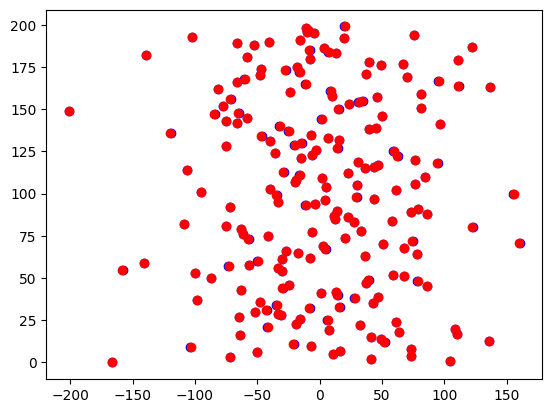

In [42]:
plt.scatter(y_pred,range(200),color='blue')
plt.scatter(y_test,range(200),color='red')
plt.show()

# The END